Loading pipeline components...: 100%|█████████████| 6/6 [00:00<00:00, 12.06it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|█████████████████████████████████████████| 200/200 [04:11<00:00,  1.26s/it]


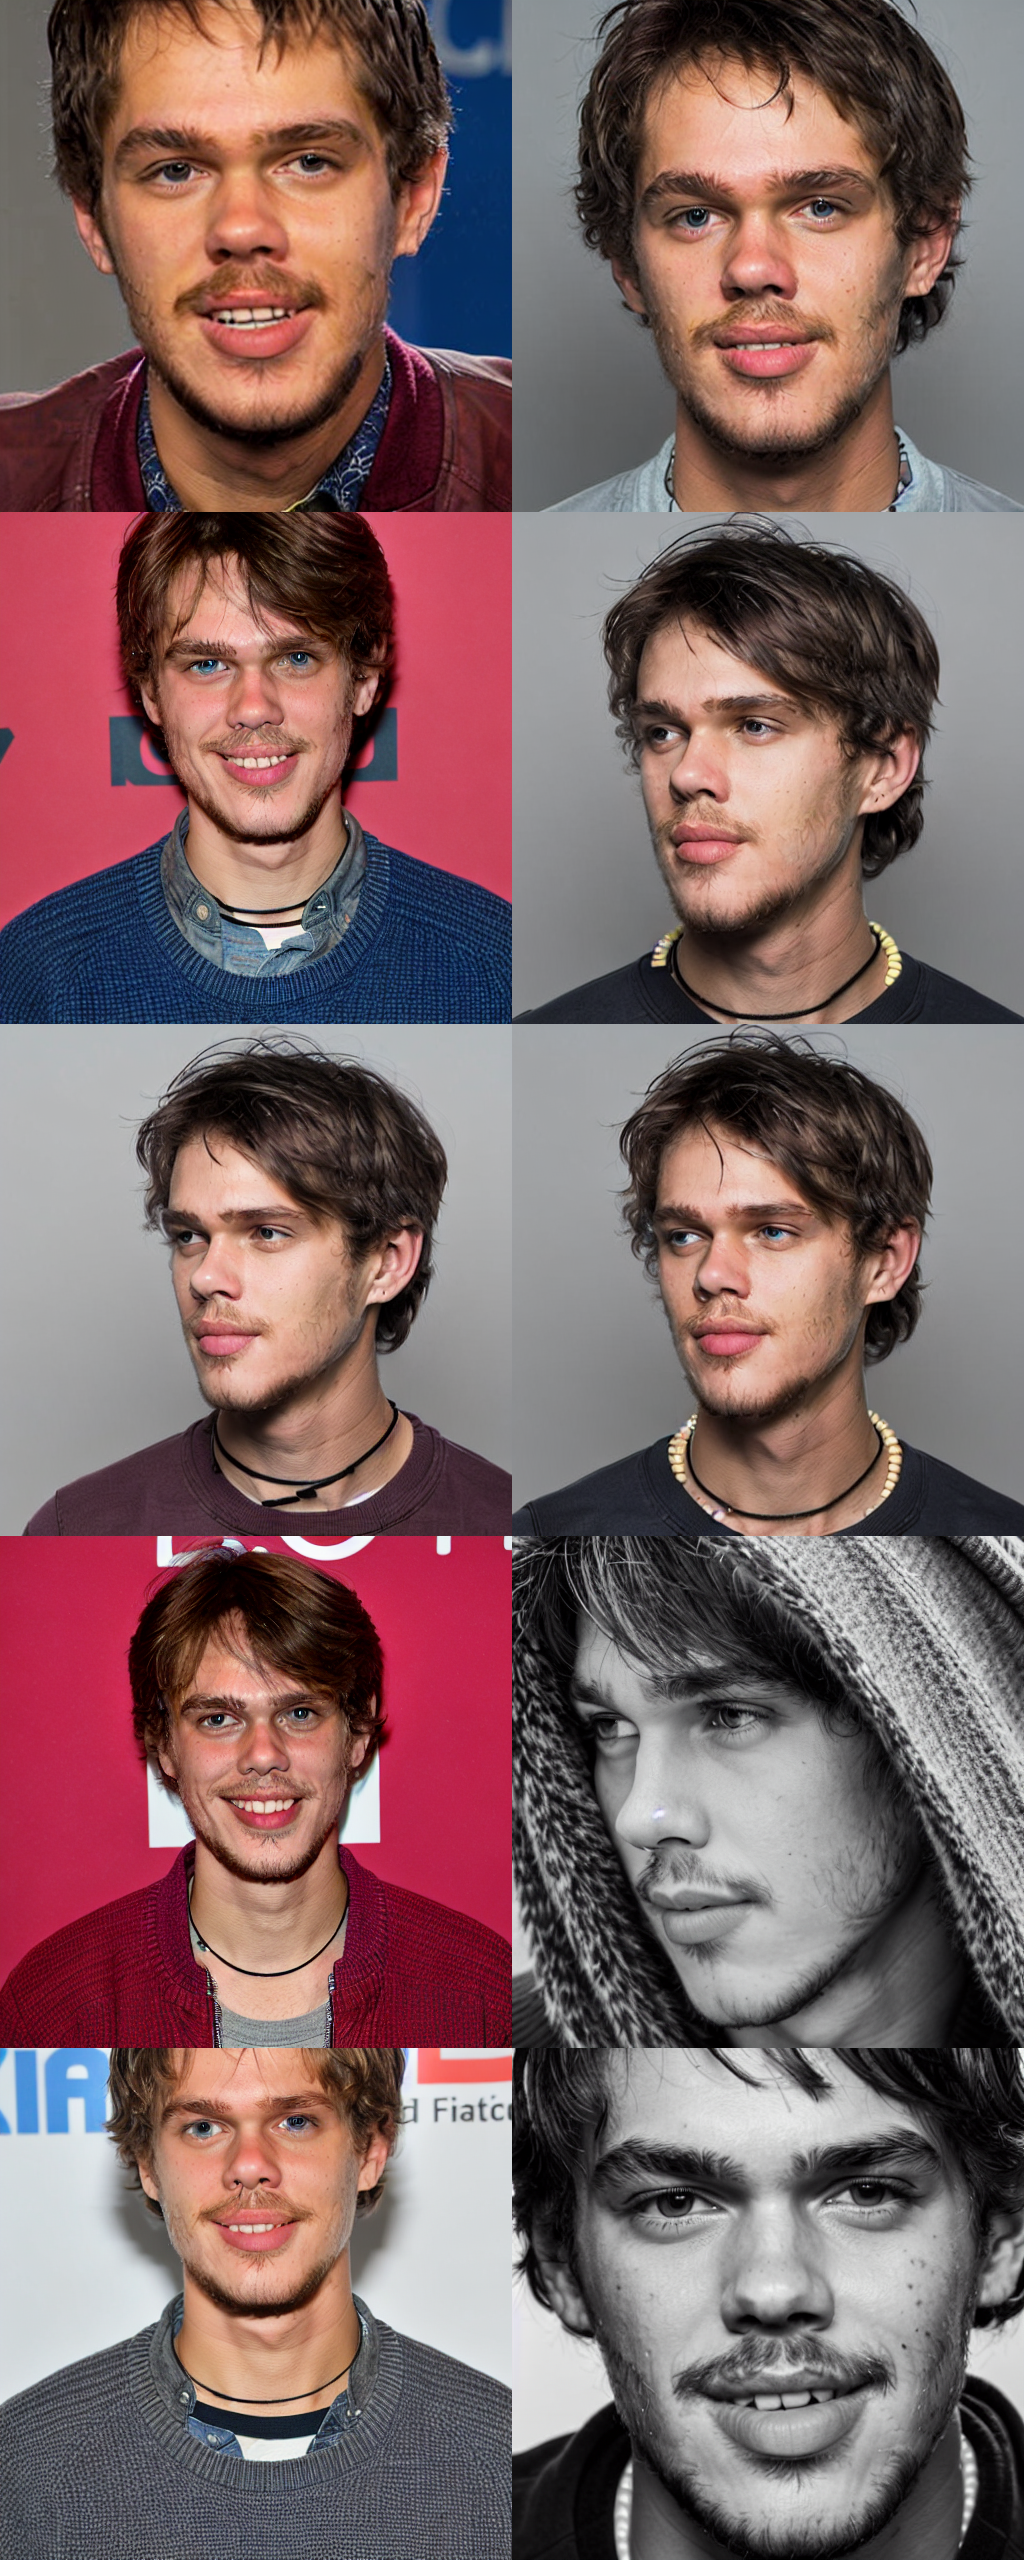

In [20]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline
import torch
from IPython.display import display
from diffusers.utils import make_image_grid


pipe = StableDiffusionPipeline.from_pretrained(pretrained_model_name_or_path = "./models/finetuned/Ellar_Coltrane",
                                               torch_dtype=torch.float16,
                                               safety_checker=None,
                                               use_safetensors=True)
pipe.to("cuda")
pipe.enable_attention_slicing()

# generator = torch.Generator(device="cuda").manual_seed(1345)


prompt = "a realistic portrait of sks, studio lighting,  dslr, ultra quality, sharp focus, tack sharp, dof, film grain, Fujifilm XT3, crystal clear, 8K UHD, highly detailed glossy eyes, high detailed skin"
negative_prompt = "poorly Rendered face, poorly drawn face, poor facial details, poorly drawn hands, poorly rendered hands, low resolution, Images cut out at the top, left, right, bottom., bad composition, mutated body parts, blurry image, disfigured, oversaturated, bad anatomy, deformed body features"
def get_inputs(batch_size=1):
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]
    prompts = batch_size * [prompt]
    negative_prompts = batch_size * [negative_prompt]
    num_inference_steps = 200
    return {"prompt": prompts, "negative_prompt": negative_prompts, "generator": generator, "num_inference_steps": num_inference_steps}


images = pipe(**get_inputs(batch_size=10)).images

make_image_grid(images, 5, 2)

# for image in images:
#     display(image)

In [22]:
for index, image in enumerate(images):
    image.save("images/Ellar_Coltrane/fake/" + str(index) + ".jpg") 

In [ ]:
!pip install opencv-python


In [ ]:
import cv2

In [ ]:
from PIL import Image
import os
p = "./instance_images/Ellar_Coltrane"
files = os.listdir(p)
for i, f in enumerate(files):
    pp = os.path.join(p, f)
    im = Image.open(pp)
    rgb_im = im.convert('RGB')
    rgb_im.save(os.path.join(p, str(i)+ '.jpeg'))